In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<h1>2 BEAM PROCESSING</h1>

In [2]:
free_ram3h = np.loadtxt('27032019/memory_usage.log') / 1024.0
free_ram3h_norm = free_ram3h / free_ram3h[0] * 100.0

Text(0.5,1,'Free RAM, 3h run')

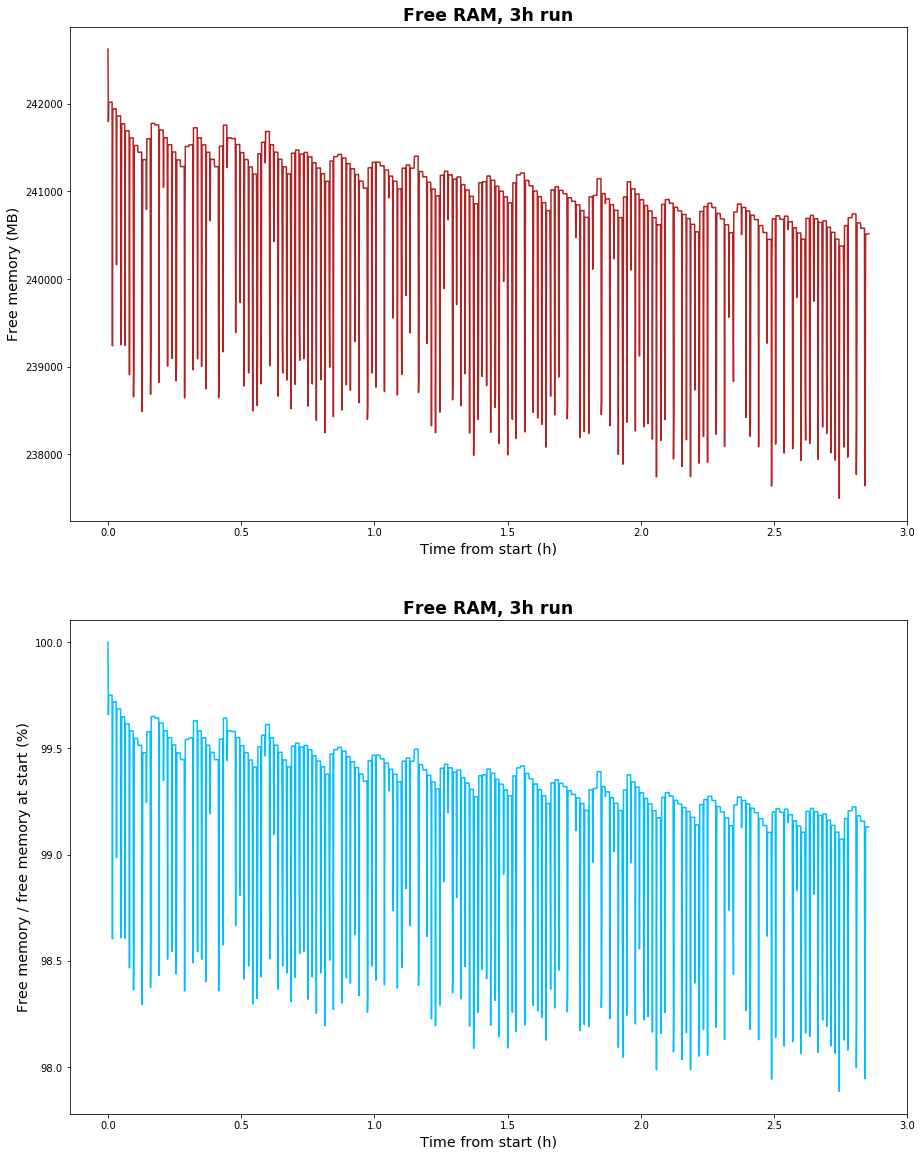

In [3]:
fig, axis = plt.subplots(2, 1, figsize=(15,20))
ax = fig.gca()

xaxis = np.arange(0, len(free_ram3h)) * 5 / 3600.0

axis[0].plot(xaxis, free_ram3h, color='firebrick')
axis[0].set_ylabel('Free memory (MB)', fontsize='x-large')
axis[0].set_xlabel('Time from start (h)', fontsize='x-large')
axis[0].set_title('Free RAM, 3h run', fontsize='xx-large', fontweight='bold')

axis[1].plot(xaxis, free_ram3h_norm, color='deepskyblue')
axis[1].set_ylabel('Free memory / free memory at start (%)', fontsize='x-large')
axis[1].set_xlabel('Time from start (h)', fontsize='x-large')
axis[1].set_title('Free RAM, 3h run', fontsize='xx-large', fontweight='bold')

In [4]:
free_ram10h = np.loadtxt('28032019/memory_usage.log') / 1024.0
free_ram10h_norm = free_ram10h / free_ram10h[0] * 100.0

In [5]:
fig, axis = plt.subplots(2, 1, figsize=(15,20))
ax = fig.gca()

xaxis = np.arange(0, len(free_ram10h)) * 5 / 3600.0

axis[0].plot(xaxis, free_ram10h, color='firebrick')
axis[0].set_ylabel('Free memory (MB)', fontsize='x-large')
axis[0].set_xlabel('Time from start (h)', fontsize='x-large')
axis[0].set_title('Free RAM, 10h run', fontsize='xx-large', fontweight='bold')

axis[1].plot(xaxis, free_ram10h_norm, color='deepskyblue')
axis[1].set_ylabel('Free memory / free memory at start (%)', fontsize='x-large')
axis[1].set_xlabel('Time from start (h)', fontsize='x-large')
axis[1].set_title('Free RAM, 10h run', fontsize='xx-large', fontweight='bold')

Text(0.5,1,'Free RAM, 10h run')

Text(0.5,1,'RAM')

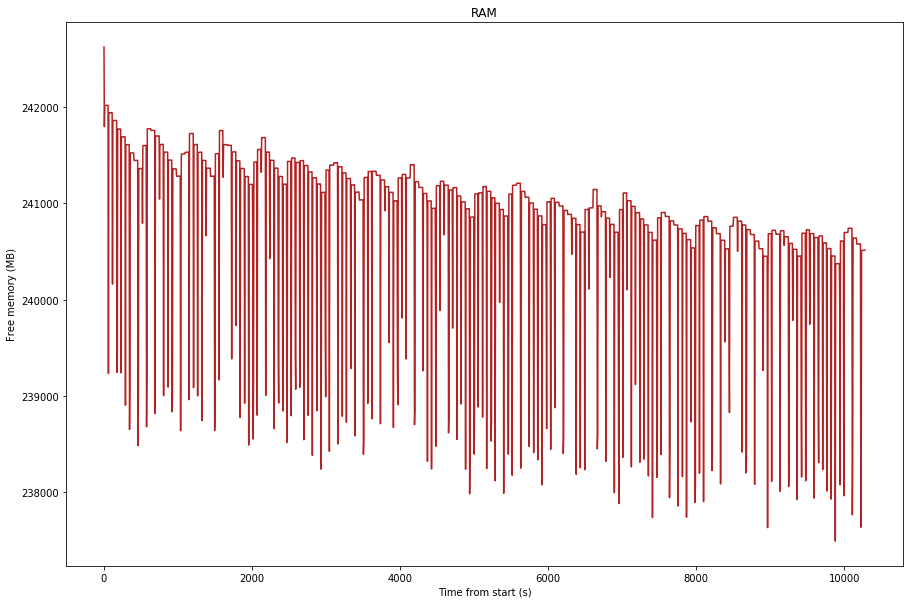

In [6]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()

xaxis = np.arange(0, len(free_ram3h)) * 5

ax.plot(xaxis, free_ram3h, color='firebrick')
ax.set_ylabel('Free memory (MB)')
ax.set_xlabel('Time from start (s)')
ax.set_title('RAM')

In [7]:
gpu0_usage = np.loadtxt('12032019/gpu0_memory_usage.log')

Text(0.5,1,'GPU0')

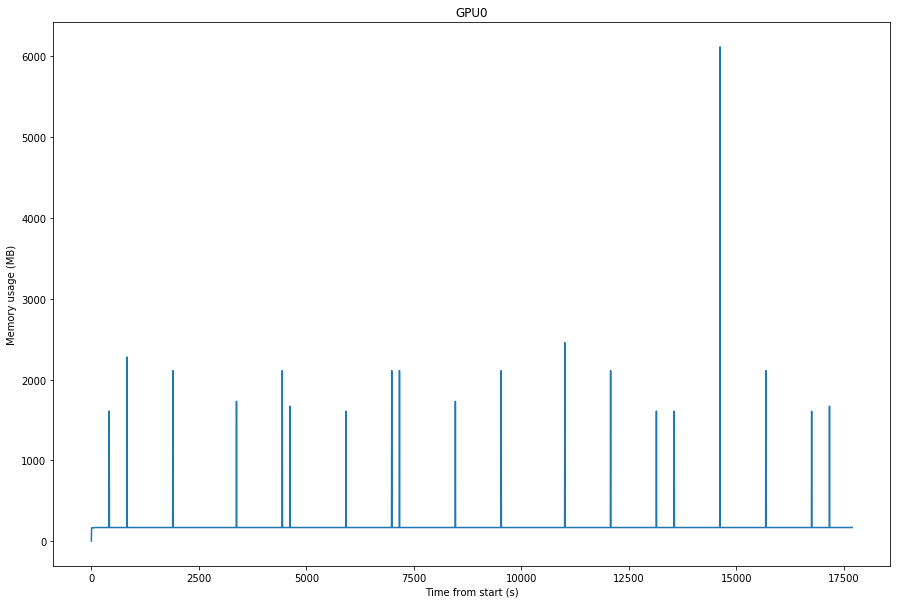

In [8]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()

xaxis = np.arange(0, len(gpu0_usage)) * 5

ax.plot(xaxis, gpu0_usage)
ax.set_ylabel('Memory usage (MB)')
ax.set_xlabel('Time from start (s)')
ax.set_title('GPU0')

In [9]:
gpu1_usage = np.loadtxt('12032019/gpu1_memory_usage.log')

Text(0.5,1,'GPU1')

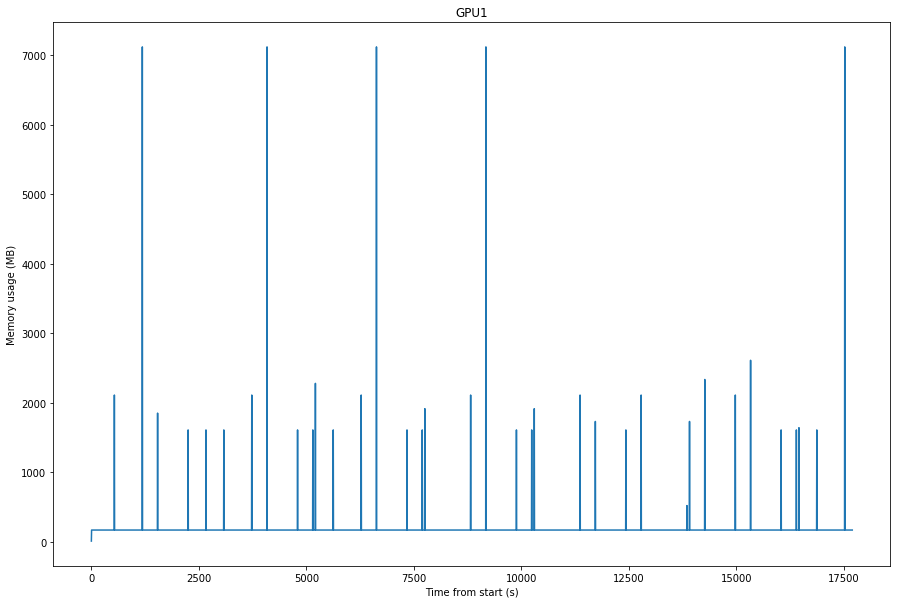

In [10]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()

xaxis = np.arange(0, len(gpu1_usage)) * 5

ax.plot(xaxis, gpu1_usage)
ax.set_ylabel('Memory usage (MB)')
ax.set_xlabel('Time from start (s)')
ax.set_title('GPU1')

<h1>3 BEAM PROCESSING</h3>

In [11]:
free_ram10h = np.loadtxt('01042019/memory_usage.log') / 1024.0
free_ram10h_norm = free_ram10h / free_ram10h[0] * 100.0

Text(0.5,1,'Free RAM, 10h run')

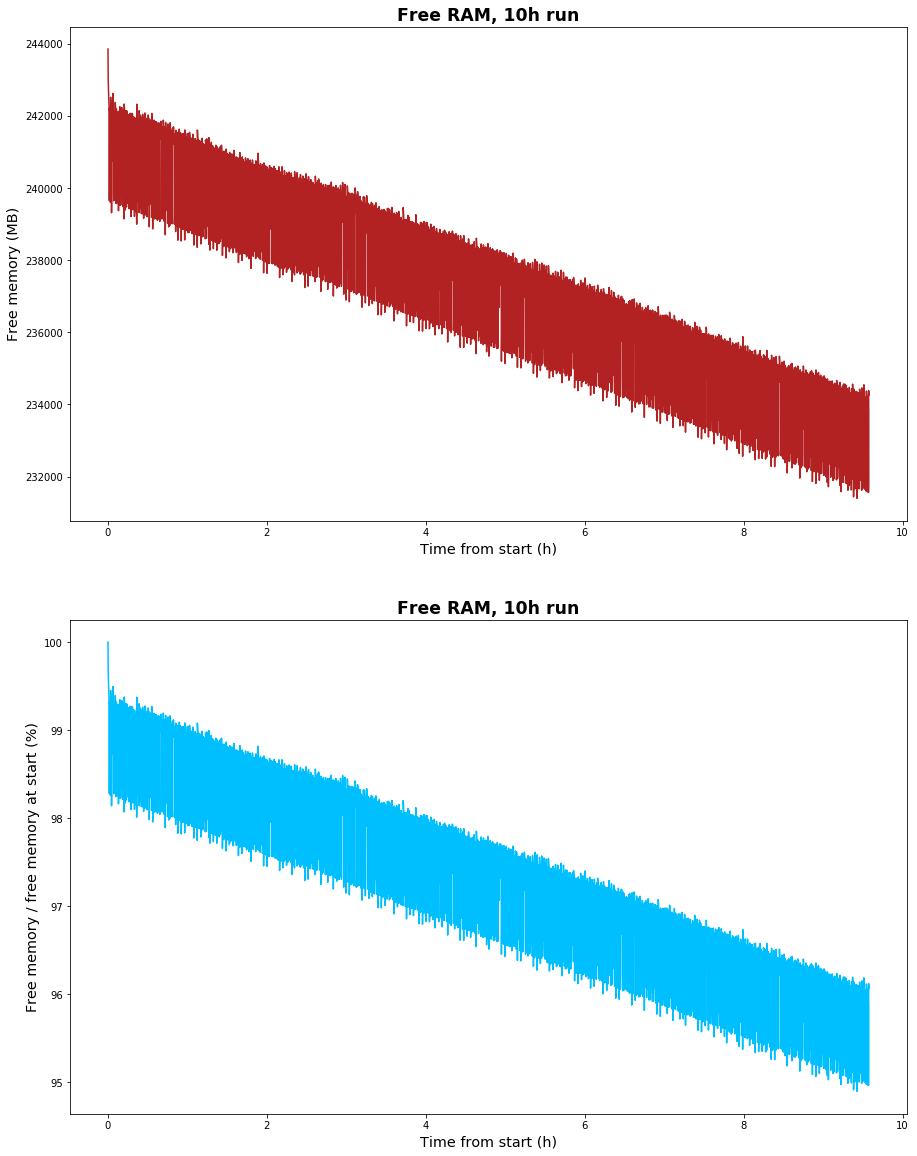

In [12]:
fig, axis = plt.subplots(2, 1, figsize=(15,20))
ax = fig.gca()

xaxis = np.arange(0, len(free_ram10h)) * 5 / 3600.0

axis[0].plot(xaxis, free_ram10h, color='firebrick')
axis[0].set_ylabel('Free memory (MB)', fontsize='x-large')
axis[0].set_xlabel('Time from start (h)', fontsize='x-large')
axis[0].set_title('Free RAM, 10h run', fontsize='xx-large', fontweight='bold')

axis[1].plot(xaxis, free_ram10h_norm, color='deepskyblue')
axis[1].set_ylabel('Free memory / free memory at start (%)', fontsize='x-large')
axis[1].set_xlabel('Time from start (h)', fontsize='x-large')
axis[1].set_title('Free RAM, 10h run', fontsize='xx-large', fontweight='bold')

<h1>3 BEAM PROCESSING WITH .FIL CANDIDATE SAVE</h1>

<h3>Candidate files (find_the_pulse.fil)</h3>

<h1>J1644-4559 PROCESSING</h1>

In [13]:
mjd_pad = 10.0 / 86400.0

In [14]:
cands = pd.read_csv('J1644/2017_11_28_13:47:32.spccl', skiprows=[0], delimiter='\t', names=['MJD', 'DM', 'Width', 'SNR'])
cands.head()

MJD       DM    Width      SNR
0  58085.574683  359.190  107.798  17.2699
1  58085.574683  361.032  107.798  16.9947
2  58085.574683  361.953  107.798  16.9353
3  58085.574683  353.357  112.697  18.0200
4  58085.574683  355.199  112.697  17.8098

In [15]:
print(cands['MJD'].values[0])
print(cands['MJD'].values[-1])

58085.5746833256
58085.584990867595


In [16]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
ax.ticklabel_format(useOffset=False)
sc = ax.scatter(x=cands['MJD'], y=cands['DM'] + 1, s= 1 * cands['Width'], c=cands['SNR'])
ax.set_yscale('log')
ax.set_xlim([cands['MJD'].values[0] - mjd_pad, cands['MJD'].values[-1] + mjd_pad])
ax.axhline(478, color='red')
ax.set_ylabel('DM + 1', fontsize=12)
ax.set_xlabel('MJD', fontsize=12)
ax.set_title('J1644-4559', fontsize=14, fontweight='bold')
cbar = plt.colorbar(sc)
cbar.set_label('SNR', fontsize=11)

In [17]:
detspeed = np.loadtxt('J1644/detection_speedup.dat')
fullspeed = np.loadtxt('J1644/full_speedup.dat')

dettime = np.loadtxt('J1644/detection_time.dat')
fulltime = np.loadtxt('J1644/full_time.dat')

In [18]:
fig = plt.figure(figsize=(15,10))

axtime = fig.gca()
axspeed = axtime.twinx()

axtime.plot(dettime, label='Detection time', color='deepskyblue')
axtime.plot(fulltime, label='Full time', color='firebrick')
axtime.set_ylabel('Time [s]', fontsize=12)

axspeed.plot(detspeed, label='Detection speedup', color='deepskyblue', linestyle='--')
axspeed.plot(fullspeed, label='Full speedup', color='firebrick', linestyle='--')

axtime.legend(loc='upper left')
axspeed.legend(loc='upper right')

<h1>Simulated single pulses</h1>

We are using simulated pulses at a range of DMs to test the capability of the pipeline to detect them properly in real time. These are currently used DMs (no scientific meaning to these values):
<ul>
    <li>250</li>
    <li>500</li>
    <li>750</li>
    <li>1000</li>
    <li>1500</li>
    <li>2000</li>
    <li>2500</li>
    <li>3000</li>
    <li>4000</li>
    <li>5000</li>
</ul>

In [29]:
dms = np.array([250.0, 500.0, 750.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0, 4000.0, 5000.0])
# Frequencies in GHz
band = 0.856
ftop = 1.711582
fbottom = ftop - band

# Dispersion delay in ms
delays = 4.15 * dms * ((fbottom)**-2 - (ftop)**-2)
print(delays)

fulltime = np.sum(delays) + 5000 * delays.shape[0]
print(fulltime)

[ 1063.15548601  2126.31097202  3189.46645803  4252.62194405
  6378.93291607  8505.24388809 10631.55486011 12757.86583214
 17010.48777618 21263.10972023]
137178.749852928


In [24]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()

ax.plot(dms, delays)

<h3>DM 250</h3>

In [31]:
cands250 = pd.read_csv('fullrate/dm250/1995_10_10_00:00:00.spccl', skiprows=[0], delimiter='\t', names=['MJD', 'DM', 'Width', 'SNR'])
cands250.head()

MJD       DM   Width       SNR
0  50000.000026  369.628  532.48  10.08750
1  50000.000026  371.163  532.48  10.17590
2  50000.000026  377.303  532.48   9.92580
3  50000.000026  365.330  532.48  10.32240
4  50000.000026  379.145  532.48   9.75583

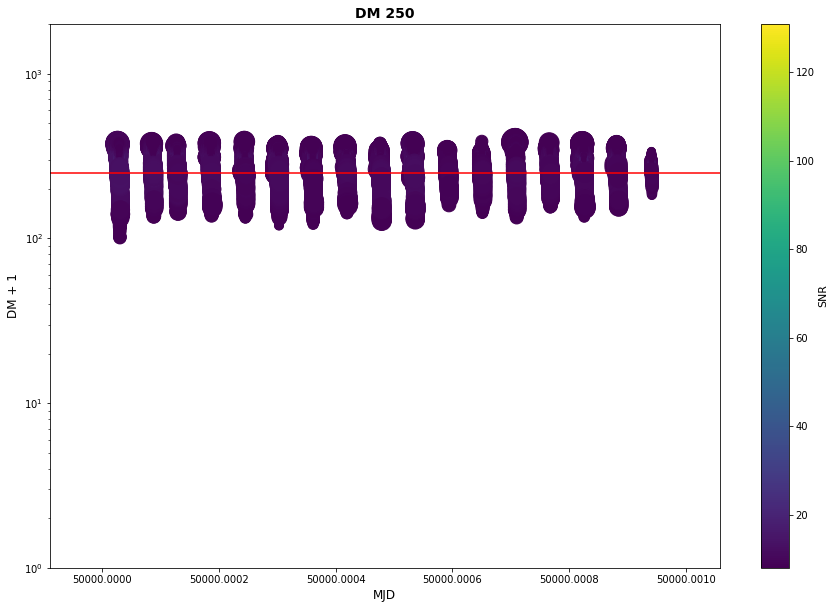

In [50]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
ax.ticklabel_format(useOffset=False)
sc = ax.scatter(x=cands250['MJD'], y=cands250['DM'] + 1, s= 1 * cands250['Width'], c=cands250['SNR'])
ax.set_yscale('log')
ax.set_xlim([cands250['MJD'].values[0] - mjd_pad, cands250['MJD'].values[-1] + mjd_pad])
ax.set_ylim([1,2000])
ax.axhline(250.0, color='red')
ax.set_ylabel('DM + 1', fontsize=12)
ax.set_xlabel('MJD', fontsize=12)
ax.set_title('DM 250', fontsize=14, fontweight='bold')
cbar = plt.colorbar(sc)
cbar.set_label('SNR', fontsize=11)

In [59]:
cands250short = cands250[cands250['Width'] < 50.0]
cands250short.head()

MJD       DM  Width      SNR
382  50000.000028  313.754  40.96  8.17615
383  50000.000028  319.894  40.96  8.19453
384  50000.000028  313.140  40.96  8.28675
385  50000.000028  317.745  40.96  8.18278
386  50000.000028  318.666  40.96  8.15686

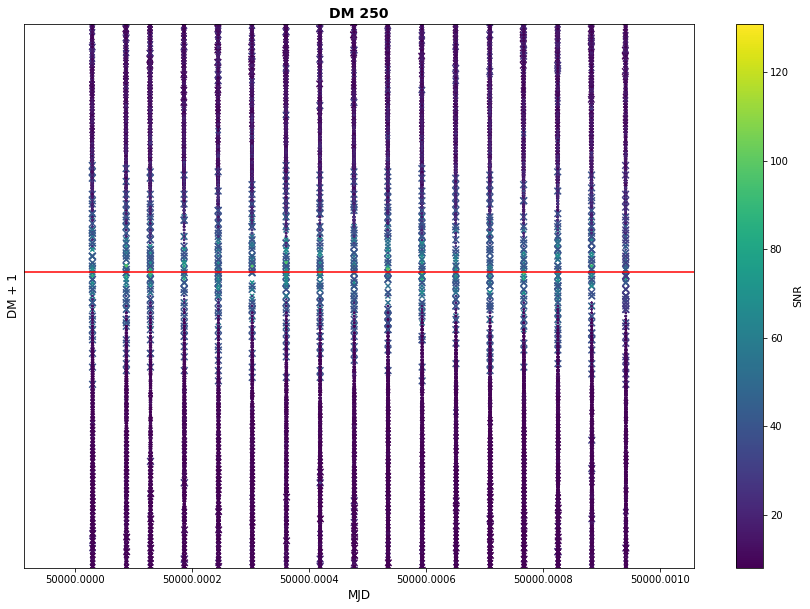

In [60]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
ax.ticklabel_format(useOffset=False)
sc = ax.scatter(x=cands250short['MJD'], y=cands250short['DM'] + 1, s= 1 * cands250short['Width'], c=cands250short['SNR'], marker='x')
ax.set_yscale('log')
ax.set_xlim([cands250short['MJD'].values[0] - mjd_pad, cands250short['MJD'].values[-1] + mjd_pad])
ax.set_ylim([225, 275])
ax.axhline(251.0, color='red')
ax.set_ylabel('DM + 1', fontsize=12)
ax.set_xlabel('MJD', fontsize=12)
ax.set_title('DM 250', fontsize=14, fontweight='bold')
cbar = plt.colorbar(sc)
cbar.set_label('SNR', fontsize=11)

<h3>DM 500</h3>

In [49]:
cands500 = pd.read_csv('fullrate/dm500/1995_10_10_00:00:00.spccl', skiprows=[0], delimiter='\t', names=['MJD', 'DM', 'Width', 'SNR'])
cands500.head()

MJD       DM    Width      SNR
0  50000.000026  605.620  884.736  9.29995
1  50000.000027  595.188  819.200  9.79720
2  50000.000027  614.096  819.200  9.26522
3  50000.000027  606.924  753.664  9.68632
4  50000.000027  652.564  688.128  8.29925

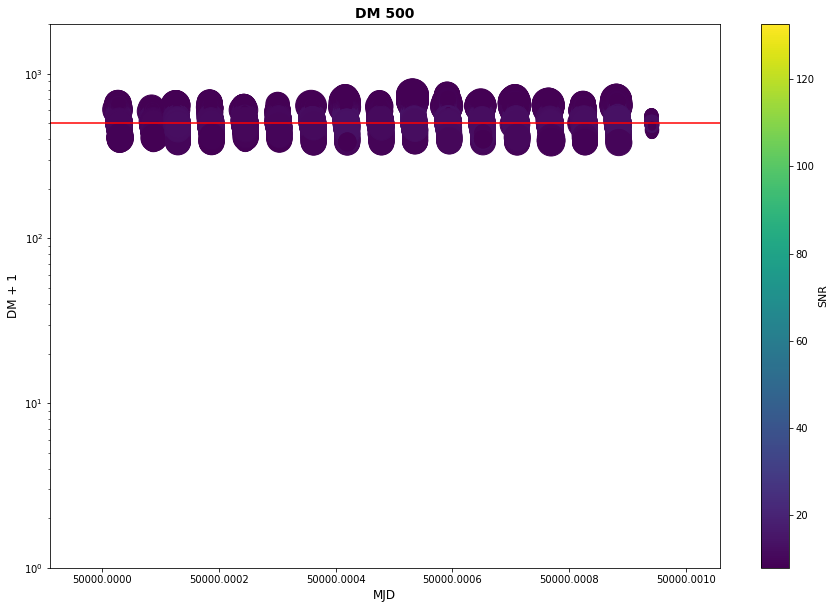

In [54]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
ax.ticklabel_format(useOffset=False)
sc = ax.scatter(x=cands500['MJD'], y=cands500['DM'] + 1, s= 1 * cands500['Width'], c=cands500['SNR'])
ax.set_yscale('log')
ax.set_xlim([cands500['MJD'].values[0] - mjd_pad, cands500['MJD'].values[-1] + mjd_pad])
ax.set_ylim([1,2000])
ax.axhline(501.0, color='red')
ax.set_ylabel('DM + 1', fontsize=12)
ax.set_xlabel('MJD', fontsize=12)
ax.set_title('DM 500', fontsize=14, fontweight='bold')
cbar = plt.colorbar(sc)
cbar.set_label('SNR', fontsize=11)

In [57]:
cands500short = cands500[cands500['Width'] < 50.0]
cands500short.head()

MJD       DM   Width      SNR
274  50000.000028  536.508  32.768  8.19735
280  50000.000028  536.508  32.768  8.25458
285  50000.000028  531.944  31.744  8.04715
286  50000.000028  528.032  32.768  9.06246
303  50000.000028  527.380  32.768  9.34953

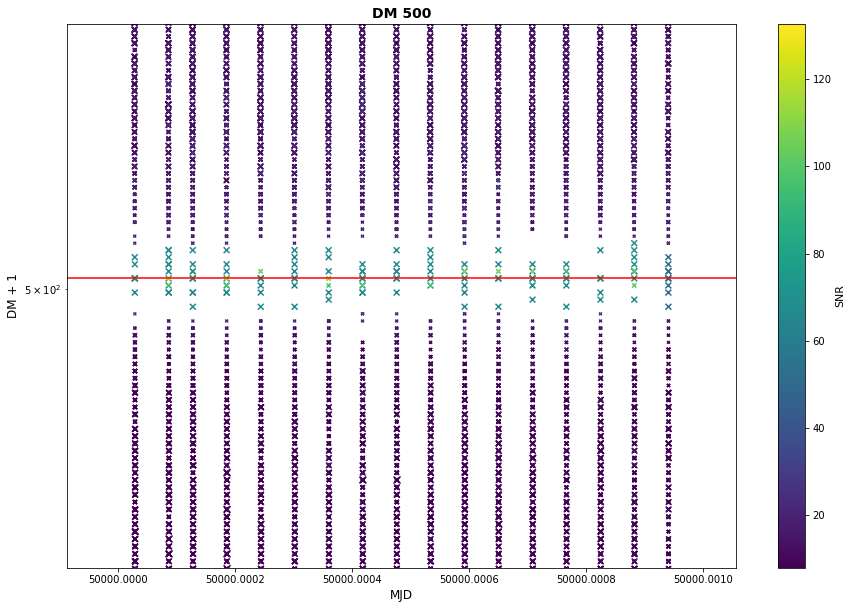

In [66]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
ax.ticklabel_format(useOffset=False)
sc = ax.scatter(x=cands500short['MJD'], y=cands500short['DM'] + 1, s= 1 * cands500short['Width'], c=cands500short['SNR'], marker='x')
ax.set_yscale('log')
ax.set_xlim([cands500short['MJD'].values[0] - mjd_pad, cands500short['MJD'].values[-1] + mjd_pad])
ax.set_ylim([475,525])
ax.axhline(501.0, color='red')
ax.set_ylabel('DM + 1', fontsize=12)
ax.set_xlabel('MJD', fontsize=12)
ax.set_title('DM 500', fontsize=14, fontweight='bold')
cbar = plt.colorbar(sc)
cbar.set_label('SNR', fontsize=11)

<h3>DM 750</h3>

In [61]:
cands750 = pd.read_csv('fullrate/dm750/1995_10_10_00:00:00.spccl', skiprows=[0], delimiter='\t', names=['MJD', 'DM', 'Width', 'SNR'])
cands750.head()

MJD       DM    Width      SNR
0  50000.000027  807.328   655.36  8.29858
1  50000.000027  878.224  1179.65  8.93725
2  50000.000027  859.234  1114.11  9.94906
3  50000.000027  870.628  1114.11  9.52008
4  50000.000027  902.278  1114.11  8.09090

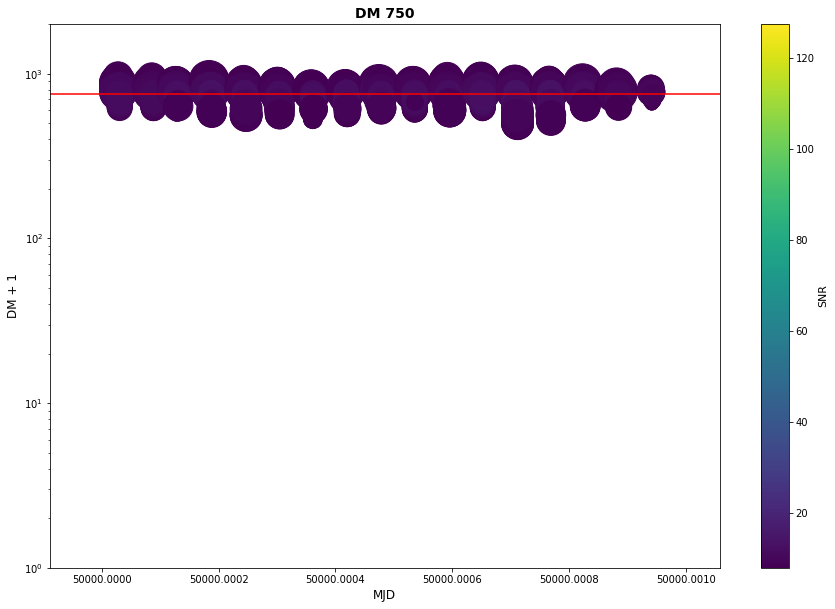

In [63]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
ax.ticklabel_format(useOffset=False)
sc = ax.scatter(x=cands750['MJD'], y=cands750['DM'] + 1, s= 1 * cands750['Width'], c=cands750['SNR'])
ax.set_yscale('log')
ax.set_xlim([cands750['MJD'].values[0] - mjd_pad, cands750['MJD'].values[-1] + mjd_pad])
ax.set_ylim([1,2000])
ax.axhline(751.0, color='red')
ax.set_ylabel('DM + 1', fontsize=12)
ax.set_xlabel('MJD', fontsize=12)
ax.set_title('DM 750', fontsize=14, fontweight='bold')
cbar = plt.colorbar(sc)
cbar.set_label('SNR', fontsize=11)

In [64]:
cands750short = cands750[cands750['Width'] < 50.0]
cands750short.head()

MJD       DM   Width      SNR
136  50000.000028  769.272  30.720  8.21822
138  50000.000028  769.272  28.672  8.06741
142  50000.000028  768.620  27.648  8.28923
146  50000.000028  768.620  25.600  8.47205
155  50000.000028  770.576  32.768  8.14661

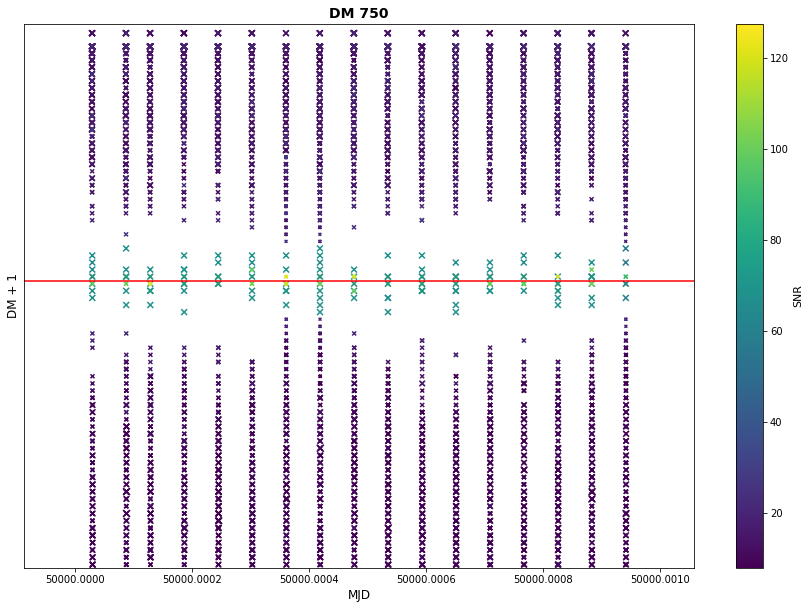

In [65]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
ax.ticklabel_format(useOffset=False)
sc = ax.scatter(x=cands750short['MJD'], y=cands750short['DM'] + 1, s= 1 * cands750short['Width'], c=cands750short['SNR'], marker='x')
ax.set_yscale('log')
ax.set_xlim([cands750short['MJD'].values[0] - mjd_pad, cands750short['MJD'].values[-1] + mjd_pad])
ax.set_ylim([725, 775])
ax.axhline(751.0, color='red')
ax.set_ylabel('DM + 1', fontsize=12)
ax.set_xlabel('MJD', fontsize=12)
ax.set_title('DM 750', fontsize=14, fontweight='bold')
cbar = plt.colorbar(sc)
cbar.set_label('SNR', fontsize=11)

<h3>DM 1000</h3>

In [67]:
cands1000 = pd.read_csv('fullrate/dm1000/1995_10_10_00:00:00.spccl', skiprows=[0], delimiter='\t', names=['MJD', 'DM', 'Width', 'SNR'])
cands1000.head()

MJD       DM    Width      SNR
0  50000.000026  1193.46  2097.15  8.00504
1  50000.000026  1251.69  1835.01  8.07649
2  50000.000026  1246.63  1835.01  8.11119
3  50000.000026  1239.03  1703.94  8.40261
4  50000.000026  1241.57  1703.94  8.28349

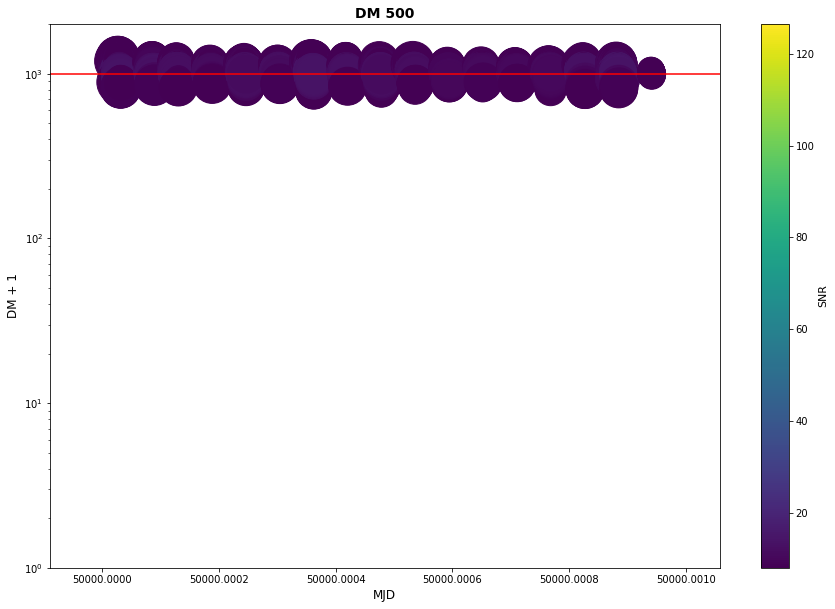

In [70]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
ax.ticklabel_format(useOffset=False)
sc = ax.scatter(x=cands1000['MJD'], y=cands1000['DM'] + 1, s= 1 * cands1000['Width'], c=cands1000['SNR'])
ax.set_yscale('log')
ax.set_xlim([cands1000['MJD'].values[0] - mjd_pad, cands1000['MJD'].values[-1] + mjd_pad])
ax.set_ylim([1,2000])
ax.axhline(1001.0, color='red')
ax.set_ylabel('DM + 1', fontsize=12)
ax.set_xlabel('MJD', fontsize=12)
ax.set_title('DM 1000', fontsize=14, fontweight='bold')
cbar = plt.colorbar(sc)
cbar.set_label('SNR', fontsize=11)

In [72]:
cands1000short = cands1000[cands1000['Width'] < 50.0]
cands1000short.head()

MJD       DM   Width      SNR
386  50000.000028  1039.01  32.768  8.13774
411  50000.000028  1039.01  32.768  8.55090
413  50000.000028  1037.74  31.744  8.20527
431  50000.000028  1030.14  32.768  8.16552
435  50000.000028  1037.74  49.152  9.27747

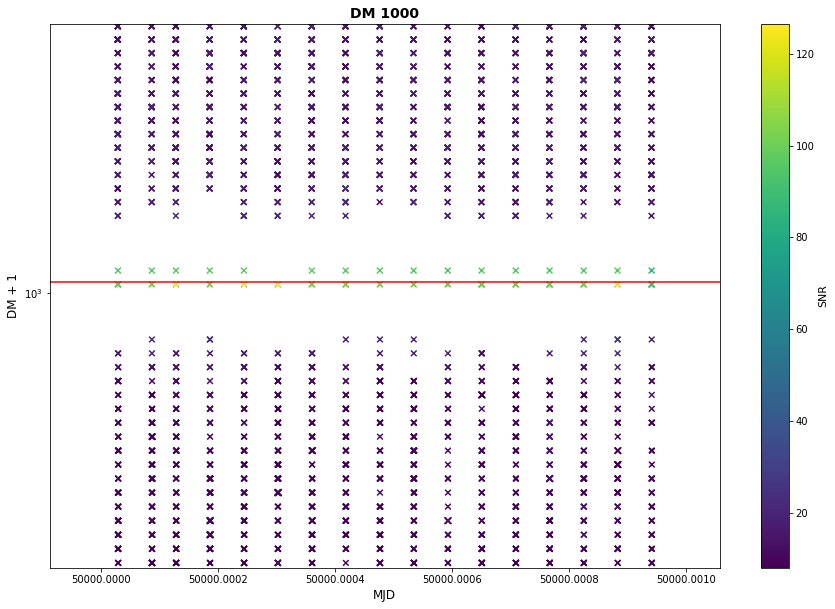

In [73]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
ax.ticklabel_format(useOffset=False)
sc = ax.scatter(x=cands1000short['MJD'], y=cands1000short['DM'] + 1, s= 1 * cands1000short['Width'], c=cands1000short['SNR'], marker='x')
ax.set_yscale('log')
ax.set_xlim([cands1000short['MJD'].values[0] - mjd_pad, cands1000short['MJD'].values[-1] + mjd_pad])
ax.set_ylim([975,1025])
ax.axhline(1001.0, color='red')
ax.set_ylabel('DM + 1', fontsize=12)
ax.set_xlabel('MJD', fontsize=12)
ax.set_title('DM 1000', fontsize=14, fontweight='bold')
cbar = plt.colorbar(sc)
cbar.set_label('SNR', fontsize=11)